**07-09 케라스 훑어보기**

**07-09 케라스의 함수형 API**

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [4]:
inputs = Input(shape = (10,))
hidden1 = Dense(64, activation ='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation = 'sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output)

In [6]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuarcy'])

In [7]:
inputs = Input(shape=(10,))
x = Dense(8, activation ='relu')(inputs)
x = Dense(4, activation ='relu')(x)
x = Dense(1, activation ='linear')(x)
model = Model(inputs, x)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

inputs = Input(shape=(1,))
output = Dense(1, activation = 'linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.complie(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fic(X,y,epochs=300)


**07-11 다층 퍼셉트론**

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

newsdata = fetch_20newsgroups(subset = 'train')
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [9]:
print('훈련용 샘플의 개수:{}'.format(len(newsdata.data)))

훈련용 샘플의 개수:11314


In [10]:
print('총 주제의 개수: {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [12]:
print('첫번째 샘플의 레이블:{}'.format(newsdata.target[0]))

첫번째 샘플의 레이블:7


In [13]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target']=pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [15]:
data.isnull().values.any()

False

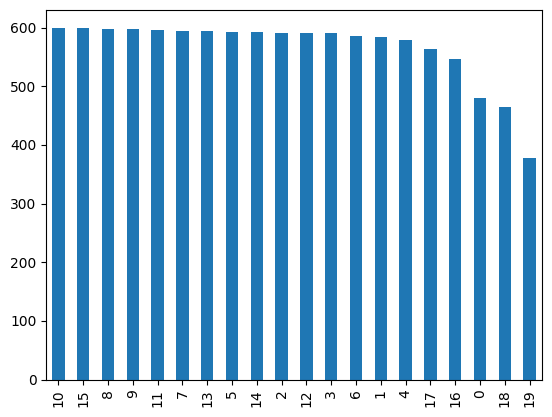

In [17]:
data['target'].value_counts().plot(kind='bar');

In [18]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle = True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target